In [12]:
import os
import matplotlib.pyplot as plt
from torchaudio import transforms
from IPython.display import Audio
import librosa

In [2]:
from classifier.audioutils import AudioUtils

In [22]:
CURRENT_DIR = os.getcwd()
AUDIO_DIR = os.path.join(CURRENT_DIR, "audio_input")

AUDIO_FILE = os.path.join(AUDIO_DIR, "01_bass_drum/BD 909 Clean 01.wav")

In [16]:
Audio(AUDIO_FILE)

In [17]:
# Get signal + convert to mono
signal, sr = AudioUtils.open(AUDIO_FILE)
signal_mono = AudioUtils.convert_mono(signal)
print("Signal tensor shape:", signal_mono.shape, "Sample rate:", sr)

Signal tensor shape: torch.Size([1, 37565]) Sample rate: 44100


In [25]:
# Get mel spectrogram
spec = AudioUtils.get_mel_spectrogram(signal_mono, sr, hop_length=128, n_mels=80)
spec = transforms.AmplitudeToDB(top_db=80)(spec)

print("Mel spectrogram shape:", spec.shape, "dtype:", spec.dtype)

Mel spectrogram shape: torch.Size([1, 80, 294]) dtype: torch.float32


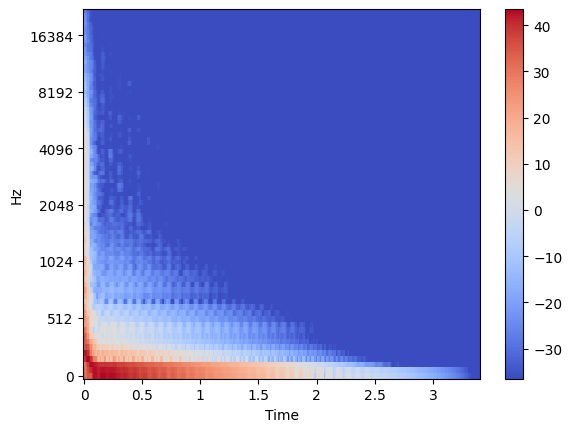

In [24]:
plt.figure()
librosa.display.specshow(spec[0].cpu().numpy(), sr=sr, x_axis="time", y_axis="mel")
plt.colorbar()
plt.show()